In [0]:

import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils'
#sys.path.append(folder)
sys.path.insert(0, folder)

In [4]:
from google.colab import drive
ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/gdrive


In [0]:
from torchvision import transforms
from helper import HelperModel
from dataset_info import DataSetInfo
from dataloader import DataLoader
#from model import Net
from transforms import Transform
from train import Train
from test import Test
from plot import Plot

### Create model and display summary

In [6]:
#model_obj = Net()
model_obj = Net1()
# create object for Model
device = HelperModel.get_device()

model = model_obj.to(device)

#create object for helper with object
helper_obj = HelperModel(model_obj)

#display summaru of model
helper_obj.display_model_summay(model, (3, 32, 32))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


### Get data set object

In [0]:
data_set_obj = DataSetInfo("cifa", "./data")

### Get the train test transforms 

In [0]:
# Create Image Transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_obj = Transform(train_transforms=transform, test_transforms=transform)
train_transforms = transform_obj.train_transforms
test_transforms = transform_obj.test_transforms

### Get Train and Test data set

In [9]:
train_set = data_set_obj.get_train_dataset(train_transforms)
test_set = data_set_obj.get_test_dataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


### Load the train and test data

In [10]:
data_loader_obj = DataLoader(train_set, test_set, batch_size=64)
train_loader = data_loader_obj.train_loader
test_loader = data_loader_obj.test_loader

CUDA Available? True


### Show some training images

plane dog deer deer


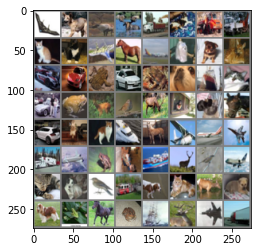

In [11]:
import torchvision
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#get some random training images
iter_train_loader = iter(train_loader)
images, labels = iter_train_loader.next()
# show images
Plot.image_show(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%3s' % classes[labels[j]] for j in range(4)))

### Run the model

In [12]:
optimizer = helper_obj.get_l2_regularizer()
EPOCHS = 5
l1_factor=0.0001

train_obj = Train()
test_obj = Test()
train_max_acc = []
train_min_loss = []
for epoch in range(1, EPOCHS):
    print("EPOCH:", epoch)
    train_obj.train(model, device, train_loader, optimizer, l1_factor=l1_factor)
    test_obj.test(model, device, test_loader, misclassfied_required=True)
    train_max_acc.append(train_obj.train_acc[-1])
    train_min_loss.append(train_obj.train_losses[-1])
miscassified_images = test_obj.misclassified_images
test_losses = test_obj.test_losses
test_acc = test_obj.test_acc
print("Maximum Training Accuracy = ", max(train_max_acc))
print("Maximum Testing Accuracy = ", max(test_acc))




  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Train Set: Train Loss=nan Batch_id=781 Accuracy=10.07: 100%|██████████| 782/782 [00:22<00:00, 34.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 2


Train Set: Train Loss=nan Batch_id=781 Accuracy=10.00: 100%|██████████| 782/782 [00:22<00:00, 35.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 3


Train Set: Train Loss=nan Batch_id=781 Accuracy=10.00: 100%|██████████| 782/782 [00:23<00:00, 33.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 4


Train Set: Train Loss=nan Batch_id=781 Accuracy=10.00: 100%|██████████| 782/782 [00:22<00:00, 34.45it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

Maximum Training Accuracy =  10.07
Maximum Testing Accuracy =  10.0


### Display graphs

In [0]:
plt_obj = Plot(train_max_acc, train_min_loss, test_acc, test_losses)
# Plot all graph
plt_obj.display_all_plot()
#plot train accuracy graph
plt_obj.plot_train_graph()
#plot train loss graph
plt_obj.plot_train_graph(plot_case="Loss")
#plot validation accuracy graph
plt_obj.plot_validation_graph()
#plot validation loss graph
plt_obj.plot_validation_graph(plot_case="Loss")
#plot 25 misclassified images
Plot.plot_misclassified(miscassified_images)